In [1]:
import numpy as np
from matplotlib import pyplot as plt

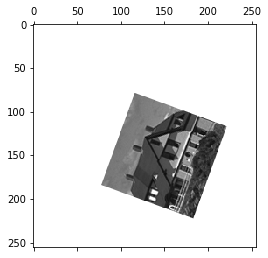

In [2]:
height1 = 256
width1 = 256
Img1 = open('lighthouse1.raw','rb').read()
Img1 = np.frombuffer(Img1,np.uint8)
ImageP1 = Img1[0:height1*width1]
ImageP1 = np.reshape(ImageP1,(height1,width1))
plt.matshow(ImageP1,cmap='gray')

In [3]:
top_corner_i = 0
top_corner_j = 0
low_corner_i = 0
low_corner_j = 0

flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP1[i,j])
        if (ImageP1[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(0,256):
            if (buffer[k]!=255):
                top_corner_j = k
                top_corner_i = i
                halt = i
                break
#bottom corner
flag = 0
for i in range(height1-1,0,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP1[i,j])
        if (ImageP1[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(255,-1,-1):
            if (buffer[k]!=255):
                low_corner_j = k
                low_corner_i = i
                halt = i
                break

#left corner 
flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP1[j,i])
        if (ImageP1[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(255,0,-1):
            if (buffer[k]!=255):
                left_corner_j = i
                left_corner_i = k
                break

#right corner 
flag = 0
for i in range(height1-1,-1,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP1[j,i])
        if (ImageP1[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(0,255):
            if (buffer[k]!=255):
                right_corner_j = i
                right_corner_i = k
                break

In [4]:
def image2cart (i,j,var):
    x = j + 0.5
    y = var - i - 0.5 
    return x,y

In [5]:
def cart2img (u,v,var):
    p = var - v - 0.5
    q = u - 0.5
    return p,q
    

In [13]:
ij1 = np.array([top_corner_i,top_corner_j])
ij2 = np.array([low_corner_i,low_corner_j])
ij3 = np.array([left_corner_i,left_corner_j])
ij4 = np.array([right_corner_i,right_corner_j])
#Corners in image coordinates
print(ij1)
print(ij2)
print(ij3)
print(ij4)

[ 80 115]
[223 183]
[185  78]
[118 221]


In [15]:
xy1 = np.zeros(2)
xy2 = np.zeros(2)
xy3 = np.zeros(2)
xy4 = np.zeros(2)
(xy1[0],xy1[1]) = image2cart(ij1[0],ij1[1],256)
(xy2[0],xy2[1]) = image2cart(ij2[0],ij2[1],256)
(xy3[0],xy3[1]) = image2cart(ij3[0],ij3[1],256)
(xy4[0],xy4[1]) = image2cart(ij4[0],ij4[1],256)
print(xy1)
print(xy2)
print(xy3)
print(xy4)

[115.5 175.5]
[183.5  32.5]
[78.5 70.5]
[221.5 137.5]


In [16]:
width = np.sqrt((xy1[0]-xy3[0])**2 + (xy1[1]-xy3[1])**2)
height = np.sqrt((xy1[0]-xy4[0])**2 + (xy1[1]-xy4[1])**2)
center = np.zeros(2)
center = ((xy3[0] + xy4[0])/2,(xy3[1] + xy4[1])/2) 
center

(150.0, 104.0)

In [17]:
theta1 = np.arctan((xy2[1]-xy3[1])/(xy2[0]-xy3[0]))
theta1

-0.3472407828961109

In [18]:
xy4

array([221.5, 137.5])

In [19]:
target_h = 160
target_w = 160
ImageF1 = np.zeros((target_h,target_w))
ImageF1n = np.zeros((target_h,target_w))
xc2 = center[0] 
yc2 = center[1] 
xc1 = -target_h/2
yc1 = -target_w/2 #160/2
sx = target_h/height + 0.015
sy = target_w/width + 0.015
theta = -np.pi/2 - theta1

for i in range(0,160):
    for j in range(0,160):
        (x0,y0) = image2cart(i,j,160)
        cartco = np.array([x0,y0,1])
        transl_matrix1 = np.array([[1,0,-xc1],[0,1,-yc1],[0,0,1]])
        transl_matrix2 = np.array([[1,0,-xc2],[0,1,-yc2],[0,0,1]])
        scale_matrix = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix1_inv = np.linalg.inv(transl_matrix1)
        transl_matrix2_inv = np.linalg.inv(transl_matrix2)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        scale_matrix_inv = np.linalg.inv(scale_matrix)
        Op1 = np.matmul(transl_matrix1_inv,cartco)
        Op2 = np.matmul(scale_matrix_inv,Op1)
        Op3 = np.matmul(rot_matrix_inv,Op2)
        Op4 = np.matmul(transl_matrix2_inv,Op3)
        u = Op4[0]
        v = Op4[1]
        (u1,v1) = cart2img(u,v,256)
        uf = int(np.floor(u1))
        vf = int(np.floor(v1))
        uc = int(np.ceil(u1))
        vc = int(np.ceil(v1))
        ha = u1 - uf
        hb = v1 - vf
        if (i==0 or j==511 or i==511 or j==0):
            ImageF1n[i,j] = ImageP1[int(u1),int(v1)]
        else:
            ImageF1n[i,j] = (1-ha)*((1-hb)*ImageP1[uf,vf] + hb*ImageP1[uf,vc]) + ha*((1-hb)*ImageP1[uc,vf] + hb*ImageP1[uc,vc])
        ImageF1[i,j] = ImageP1[int(u1),int(v1)]

In [22]:
sy

1.4521901655838703

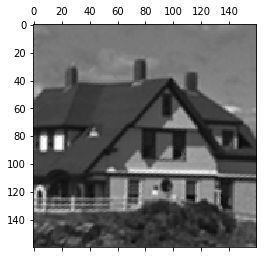

In [23]:
plt.matshow(ImageF1n,cmap='gray')

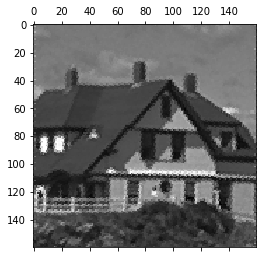

In [285]:
plt.figure(figsize=(4,4)) #before interplation
plt.matshow(ImageF1,cmap='gray',fignum=1)

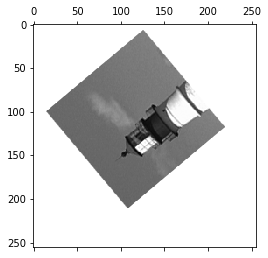

In [24]:
height2 = 256
width2 = 256
Img2 = open('lighthouse2.raw','rb').read()
Img2 = np.frombuffer(Img2,np.uint8)
ImageP2 = Img2[0:height2*width2]
ImageP2 = np.reshape(ImageP2,(height1,width1))
plt.matshow(ImageP2,cmap='gray')

In [25]:
top_corner_i = 0
top_corner_j = 0
low_corner_i = 0
low_corner_j = 0

flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP2[i,j])
        if (ImageP2[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(0,256):
            if (buffer[k]!=255):
                right_corner_j = k
                right_corner_i = i
                halt = i
                break
#bottom corner
flag = 0
for i in range(height1-1,0,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP2[i,j])
        if (ImageP2[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(255,-1,-1):
            if (buffer[k]!=255):
                left_corner_j = k
                left_corner_i = i
                halt = i
                break

#left corner 
flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP2[j,i])
        if (ImageP2[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(255,0,-1):
            if (buffer[k]!=255):
                top_corner_j = i
                top_corner_i = k
                break

#right corner 
flag = 0
for i in range(height1-1,-1,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP2[j,i])
        if (ImageP2[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(0,255):
            if (buffer[k]!=255):
                low_corner_j = i
                low_corner_i = k
                break

In [26]:
ij1 = np.array([top_corner_i,top_corner_j])
ij2 = np.array([low_corner_i,low_corner_j])
ij3 = np.array([left_corner_i,left_corner_j])
ij4 = np.array([right_corner_i,right_corner_j])
print(ij1)
print(ij2)
print(ij3)
print(ij4)

[102  15]
[116 218]
[212 108]
[  8 125]


In [28]:
xy1 = np.zeros(2)
xy2 = np.zeros(2)
xy3 = np.zeros(2)
xy4 = np.zeros(2)
(xy1[0],xy1[1]) = image2cart(ij1[0],ij1[1],256)
(xy2[0],xy2[1]) = image2cart(ij2[0],ij2[1],256)
(xy3[0],xy3[1]) = image2cart(ij3[0],ij3[1],256)
(xy4[0],xy4[1]) = image2cart(ij4[0],ij4[1],256)

width = np.sqrt((xy1[0]-xy3[0])**2 + (xy1[1]-xy3[1])**2)
height = np.sqrt((xy1[0]-xy4[0])**2 + (xy1[1]-xy4[1])**2)
center = np.zeros(2)
center = ((xy3[0] + xy4[0])/2,(xy3[1] + xy4[1])/2) 

theta2 = np.arctan((xy2[1]-xy3[1])/(xy2[0]-xy3[0]))
print(theta2)
print(xy1)
print(xy2)
print(xy3)
print(xy4)
print(center)

0.7175413405411444
[ 15.5 153.5]
[218.5 139.5]
[108.5  43.5]
[125.5 247.5]
(117.0, 145.5)


In [30]:
target_h = 160
target_w = 160
ImageF2 = np.zeros((target_h,target_w))
ImageF2n = np.zeros((target_h,target_w))
#ImageF2 = np.zeros((256,256))
#ImageF2n = np.zeros((256,256))
xc2 = center[0]
yc2 = center[1]
xc1 = -target_h/2
yc1 = -target_w/2 #160/2
sx = target_h/height
sy = target_w/width
theta = -np.pi/2 - theta2 +0.02

for i in range(0,160):
    for j in range(0,160):
        (x0,y0) = image2cart(i,j,160)
        cartco = np.array([x0,y0,1])
        transl_matrix1 = np.array([[1,0,-xc1],[0,1,-yc1],[0,0,1]])
        transl_matrix2 = np.array([[1,0,-xc2],[0,1,-yc2],[0,0,1]])
        scale_matrix = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix1_inv = np.linalg.inv(transl_matrix1)
        transl_matrix2_inv = np.linalg.inv(transl_matrix2)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        scale_matrix_inv = np.linalg.inv(scale_matrix)
        Op1 = np.matmul(transl_matrix1_inv,cartco)
        Op2 = np.matmul(scale_matrix_inv,Op1)
        Op3 = np.matmul(rot_matrix_inv,Op2)
        Op4 = np.matmul(transl_matrix2_inv,Op3)
        u = Op4[0]
        v = Op4[1]
        (u1,v1) = cart2img(u,v,256)
        uf = int(np.floor(u1))
        vf = int(np.floor(v1))
        uc = int(np.ceil(u1))
        vc = int(np.ceil(v1))
        ha = u1 - uf
        hb = v1 - vf
        ImageF2n[i,j] = (1-ha)*((1-hb)*ImageP2[uf,vf] + hb*ImageP2[uf,vc]) + ha*((1-hb)*ImageP2[uc,vf] + hb*ImageP2[uc,vc])
        ImageF2[i,j] = ImageP2[int(u1),int(v1)]

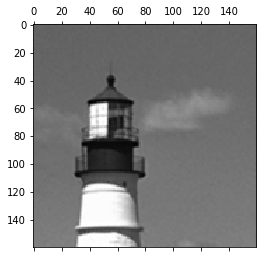

In [31]:
plt.matshow(ImageF2n,cmap='gray')

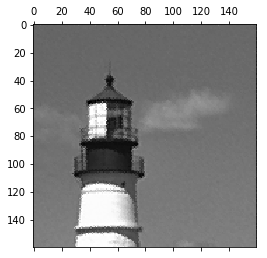

In [32]:
plt.matshow(ImageF2,cmap='gray')

In [35]:
print(xy1)
print(xy2)
print(xy3)
print(xy4)
print(height)
print(width)
print(sx)
print(sy)

[ 15.5 153.5]
[218.5 139.5]
[108.5  43.5]
[125.5 247.5]
144.69277798148738
144.04513181638595
1.1057911958845044
1.110762980896513


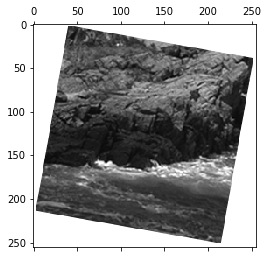

In [36]:
height3 = 256
width3 = 256
Img3 = open('lighthouse3.raw','rb').read()
Img3 = np.frombuffer(Img3,np.uint8)
ImageP3 = Img3[0:height3*width3]
ImageP3 = np.reshape(ImageP3,(height3,width3))
plt.matshow(ImageP3,cmap='gray')

In [41]:
top_corner_i = 0
top_corner_j = 0
low_corner_i = 0
low_corner_j = 0

flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP3[i,j])
        if (ImageP3[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(0,256):
            if (buffer[k]!=255):
                left_corner_j = k
                left_corner_i = i
                halt = i
                break
#bottom corner
flag = 0
for i in range(height1-1,0,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP3[i,j])
        if (ImageP3[i,j]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if (flag == 1):
        for k in range(255,-1,-1):
            if (buffer[k]!=255):
                right_corner_j = k
                right_corner_i = i
                halt = i
                break

#left corner 
flag = 0
for i in range(0,height1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP3[j,i])
        if (ImageP3[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(255,0,-1):
            if (buffer[k]!=255):
                low_corner_j = i
                low_corner_i = k
                break

#right corner 
flag = 0
for i in range(height1-1,-1,-1):
    if(flag == 1):
        break
    buffer = []
    count = 0
    for j in range(0,width1):
        buffer.append(ImageP3[j,i])
        if (ImageP3[j,i]==255):
            count = count + 1
    if(count != 256):
        flag = 1
    if(flag == 1):
        for k in range(0,255):
            if (buffer[k]!=255):
                top_corner_j = i
                top_corner_i = k
                break
                
ij1 = np.array([top_corner_i,top_corner_j])
ij2 = np.array([low_corner_i,low_corner_j])
ij3 = np.array([left_corner_i,left_corner_j])
ij4 = np.array([right_corner_i,right_corner_j])

xy1 = np.zeros(2)
xy2 = np.zeros(2)
xy3 = np.zeros(2)
xy4 = np.zeros(2)
(xy1[0],xy1[1]) = image2cart(ij1[0],ij1[1],256)
(xy2[0],xy2[1]) = image2cart(ij2[0],ij2[1],256)
(xy3[0],xy3[1]) = image2cart(ij3[0],ij3[1],256)
(xy4[0],xy4[1]) = image2cart(ij4[0],ij4[1],256)

width = np.sqrt((xy1[0]-xy3[0])**2 + (xy1[1]-xy3[1])**2)
height = np.sqrt((xy1[0]-xy4[0])**2 + (xy1[1]-xy4[1])**2)
center = np.zeros(2)
center = ((xy3[0] + xy4[0])/2,(xy3[1] + xy4[1])/2) 

theta3 = np.arctan((xy2[1]-xy3[1])/(xy2[0]-xy3[0]))
theta3
print(ij1)
print(ij2)
print(ij3)
print(ij4)
print(theta3)

[ 40 251]
[214   3]
[ 3 40]
[251 214]
1.3972057931300859


In [42]:
target_h = 160
target_w = 160
ImageF3n = np.zeros((target_h,target_w))
ImageF3 = np.zeros((target_h,target_w))
xc2 = center[0]
yc2 = center[1]
xc1 = -target_h/2
yc1 = -target_w/2 #160/2
sx = target_h/height
sy = target_w/width
theta = np.pi/2 - theta3

for i in range(0,160):
    for j in range(0,160):
        (x0,y0) = image2cart(i,j,160)
        cartco = np.array([x0,y0,1])
        transl_matrix1 = np.array([[1,0,-xc1],[0,1,-yc1],[0,0,1]])
        transl_matrix2 = np.array([[1,0,-xc2],[0,1,-yc2],[0,0,1]])
        scale_matrix = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix1_inv = np.linalg.inv(transl_matrix1)
        transl_matrix2_inv = np.linalg.inv(transl_matrix2)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        scale_matrix_inv = np.linalg.inv(scale_matrix)
        Op1 = np.matmul(transl_matrix1_inv,cartco)
        Op2 = np.matmul(scale_matrix_inv,Op1)
        Op3 = np.matmul(rot_matrix_inv,Op2)
        Op4 = np.matmul(transl_matrix2_inv,Op3)
        u = Op4[0]
        v = Op4[1]
        (u1,v1) = cart2img(u,v,256)
        uf = int(np.floor(u1))
        vf = int(np.floor(v1))
        uc = int(np.ceil(u1))
        vc = int(np.ceil(v1))
        ha = u1 - uf
        hb = v1 - vf
        ImageF3n[i,j] = (1-ha)*((1-hb)*ImageP3[uf,vf] + hb*ImageP3[uf,vc]) + ha*((1-hb)*ImageP3[uc,vf] + hb*ImageP3[uc,vc])
        ImageF3[i,j] = ImageP3[int(u1),int(v1)]

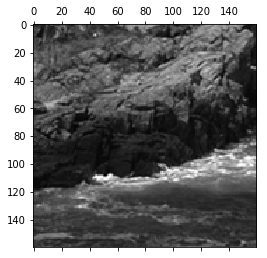

In [43]:
plt.matshow(ImageF3n,cmap='gray')

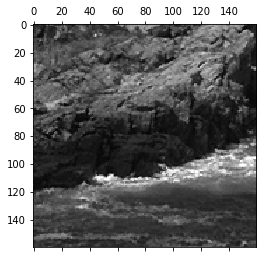

In [44]:
plt.matshow(ImageF3,cmap='gray')

In [45]:
print(xy1)
print(xy2)
print(xy3)
print(xy4)
print(height)
print(width)
print(sx)
print(sy)

[251.5 215.5]
[ 3.5 41.5]
[ 40.5 252.5]
[214.5   4.5]
214.21951358361358
214.21951358361358
0.7468974106205747
0.7468974106205747


In [46]:
print(ij1)
print(ij2)
print(ij3)
print(ij4)
print

[ 40 251]
[214   3]
[ 3 40]
[251 214]


<function print>

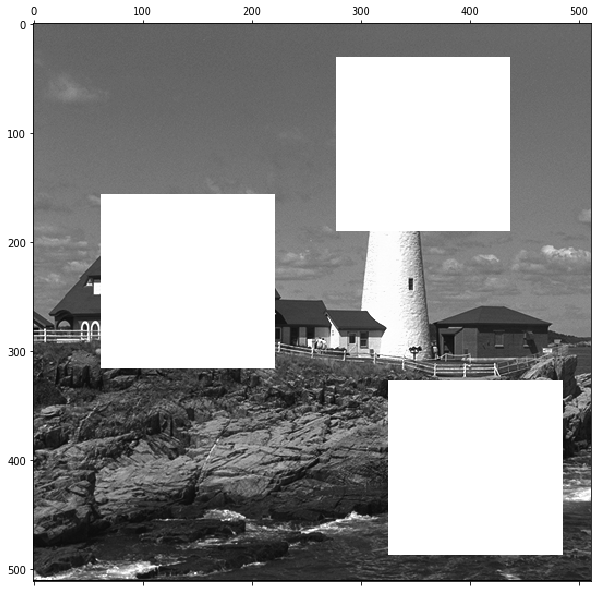

In [47]:
height = 512
width = 512
Img = open('lighthouse.raw','rb').read()
Img = np.frombuffer(Img,np.uint8)
ImageG = Img[0:height*width]
ImageG = np.reshape(ImageG,(height,width))
#plt.matshow(ImageG,cmap='gray')
plt.figure(figsize=(10,12))
plt.matshow(ImageG,cmap='gray',fignum=1)

In [48]:
window_size = 160
corners = np.zeros((3,4,2))
g = 0
mask = np.ones((window_size,window_size))
for i in range(0,window_size):
    for j in range(0,window_size):
        mask[i,j] = 255
        
start_point = int(window_size/2)
end_point = 512 - int(window_size/2)
for i in range (start_point,end_point):
       for j in range (start_point,end_point):
            count = 0
            i1 = 0
            for k in range(i-80,i+80):
                j1=0
                for l in range(j-80,j+80):
                    #if (i1==160):
                        #print("problem")
                    if (mask[i1,j1] == ImageG[k,l]):
                        count = count + 1
                    j1 = j1 +1
                i1 = i1 +1
            if(count == window_size*window_size):
                corners[g][0][0] = i-80
                corners[g][0][1] = j-80
                corners[g][1][0] = i+80
                corners[g][1][1] = j-80
                corners[g][2][0] = i-80
                corners[g][2][1] = j+80
                corners[g][3][0] = i+80
                corners[g][3][1] = j+80
                g = g + 1

KeyboardInterrupt: 

In [297]:
ImageG1 = np.zeros((512,512))
for i in range (0,512):
    for j in range(0,512):
        if (ImageG[i,j] == 255):
            ImageG1[i,j] = 255
        else:
            ImageG1[i,j] = 0
            
height = 512
width = 512
flag = 0
for i in range(0,height):
    if(flag == 1):
        break
    buffer = []
    white = 0
    for j in range(0,width):
        buffer.append(ImageG1[i,j])
        if (ImageG1[i,j]==255):
            white = white + 1
    if(white == 160):
        flag = 1
    if (flag == 1):
        for k in range(0,512):
            if (buffer[k]==255):
                corner_column1 = k
                corner_row1 = i
                break
print(corner_row1)
print(corner_column1)

31
278


In [57]:
ImageG1 = np.zeros((512,512))
for i in range (0,512):
    for j in range(0,512):
        if (ImageG[i,j] == 255):
            ImageG1[i,j] = 255
        else:
            ImageG1[i,j] = 0
            
height = 512
width = 512
flag = 0
for i in range(0,height):
    if(flag == 1):
        break
    buffer = []
    white = 0
    for j in range(0,width):
        buffer.append(ImageG1[j,i])
        if (ImageG1[j,i]==255):
            white = white + 1
    if(white == 160):
        flag = 1
    if (flag == 1):
        for k in range(0,512):
            if (buffer[k]==255):
                corner_column2 = i
                corner_row2 = k
                break
print(corner_row2)
print(corner_column2) #corner of house in main image - top left

157
62


In [51]:
ImageG1 = np.zeros((512,512))
for i in range (0,512):
    for j in range(0,512):
        if (ImageG[i,j] == 255):
            ImageG1[i,j] = 255
        else:
            ImageG1[i,j] = 0
            
height = 512
width = 512
flag = 0
for i in range(height-1,0,-1):
    if(flag == 1):
        break
    buffer = []
    white = 0
    for j in range(0,width):
        buffer.append(ImageG1[j,i])
        if (ImageG1[j,i]==255):
            white = white + 1
    if(white == 160):
        flag = 1
    if (flag == 1):
        for k in range(0,512):
            if (buffer[k]==255):
                corner_column3 = i - 159
                corner_row3 = k 
                break
print(corner_row3)
print(corner_column3) #corner of the river in main image - top left 

328
326


In [52]:
ImageG1 = np.zeros((512,512))
for i in range (0,512):
    for j in range(0,512):
        if (ImageG[i,j] == 255):
            ImageG1[i,j] = 255
        else:
            ImageG1[i,j] = 0
            
height = 512
width = 512
flag = 0
for i in range(0,height):
    if(flag == 1):
        break
    buffer = []
    white = 0
    for j in range(0,width):
        buffer.append(ImageG1[i,j])
        if (ImageG1[i,j]==255):
            white = white + 1
    if(white == 160):
        flag = 1
    if (flag == 1):
        for k in range(0,512):
            if (buffer[k]==255):
                corner_column1 = k
                corner_row1 = i
                break
print(corner_row1)
print(corner_column1) #corner of the tower

31
278


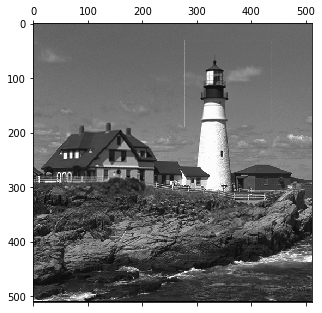

In [58]:
ImageG.flags
ImageG.setflags(write=1)


ImageFn = np.zeros((512,512))
for i in range(corner_row2,corner_row2+160):
    for j in range(corner_column2,corner_column2+160):
        ImageG[i,j] = ImageF1n[i-corner_row2,j-corner_column2]  
for i in range(corner_row1,corner_row1+160):
    for j in range(corner_column1,corner_column1+160):
        ImageG[i,j] = ImageF2n[i-corner_row1,j-corner_column1]  
for i in range(corner_row3,corner_row3+160):
    for j in range(corner_column3,corner_column3+160):
        ImageG[i,j] = ImageF3n[i-corner_row3,j-corner_column3]  

plt.figure(figsize=(5,5))
plt.matshow(ImageG,cmap='gray',fignum=1)

In [54]:
ImageG.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [55]:
ImageG.setflags(write=1)


# Extra Code below.. not needed

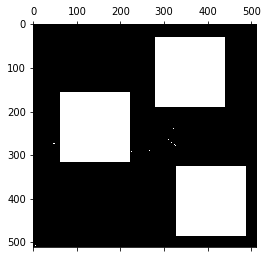

In [229]:
Img2 = open('lighthouse2.raw','rb').read()
Img2 = np.frombuffer(Img2,np.uint8)
ImageP2 = Img2[0:height1*width1]
ImageP2 = np.reshape(ImageP2,(height1,width1))
plt.matshow(ImageG1,cmap='gray')

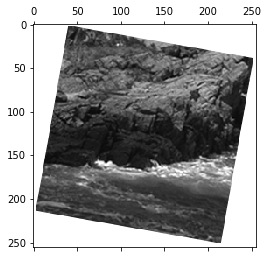

In [5]:
Img3 = open('lighthouse3.raw','rb').read()
Img3 = np.frombuffer(Img3,np.uint8)
ImageP3 = Img3[0:height1*width1]
ImageP3 = np.reshape(ImageP3,(height1,width1))
plt.matshow(ImageP3,cmap='gray')

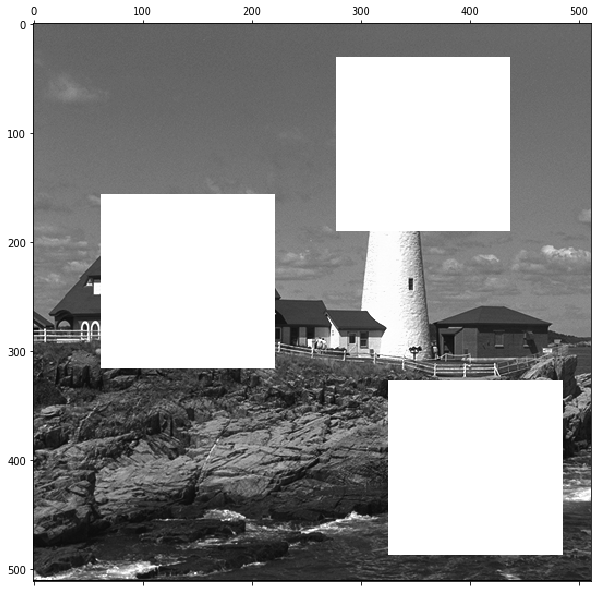

In [6]:
height = 512
width = 512
Img = open('lighthouse.raw','rb').read()
Img = np.frombuffer(Img,np.uint8)
ImageG = Img[0:height*width]
ImageG = np.reshape(ImageG,(height,width))
#plt.matshow(ImageG,cmap='gray')
plt.figure(figsize=(10,12))
plt.matshow(ImageG,cmap='gray',fignum=1)

In [7]:
img_new = np.zeros((height,width))
for i in range (0,1):
    for j in range(0,1):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        imco[0] = i
        imco[1] = j
        imco[2] = 1
        cart_matrix = np.array([[0,1,-0.5],[-1,0,j+0.5],[0,0,1]])
        cartco = np.matmul(cart_matrix,imco)
        x = cartco [0]
        y = cartco [1]
        #transl_matrix = np.array([[1,0,-x],[0,1,-y],[0,0,1]])
        rot_matrix = np.array([[np.cos(70),-np.sin(70),0],[np.sin(70),np.cos(70),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        transl = np.matmul(transl_matrix_inv,cartco)
        im_matrix = np.linalg.inv(cart_matrix)
        imco = np.matmul(im_matrix,transl)
        xtn = int(imco[0])
        ytn = int(imco[1])
        img_new[xtn,ytn] = ImageP1[i,j]
        


NameError: name 'transl_matrix' is not defined

In [ ]:
plt.figure(figsize=(10,12))
plt.matshow(img_new,cmap='gray',fignum=1)

In [ ]:
ImageG[0,0]

In [ ]:
jk = np.array([0,0,1])
xy = np.array([0,0,0])
cart_matrix = np.array([[0,1,-0.5],[-1,0,0+0.5],[0,0,1]])

In [ ]:
np.matmul(cart_matrix,jk)

In [ ]:
 transl_matrix = np.array([[1,0,0.5],[0,1,-0.5],[0,0,1]])
transl_matrix_inv = np.linalg.inv(transl_matrix)

In [ ]:
transl_matrix_inv

In [ ]:
transl_matrix

In [ ]:
transl = np.matmul(transl_matrix_inv,cartco)

In [ ]:
transl

In [8]:
img_new = np.zeros((height,width))
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        imco[0] = i
        imco[1] = j
        imco[2] = 1
        i_offset = 127 - i 
        j_offset = j - 127
        cartco = ([i_offset, j_offset, 1])
        transl_matrix = np.array([[1,0,-x],[0,1,-y],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        transl = np.matmul(transl_matrix_inv,cartco)
        xtn = 127 - transl[0]
        ytn = 127 + transl[1]
        xtn = int(np.rint(xtn))
        ytn = int(np.rint(ytn))
        img_new[xtn,ytn] = ImageP1[i,j]
        
        

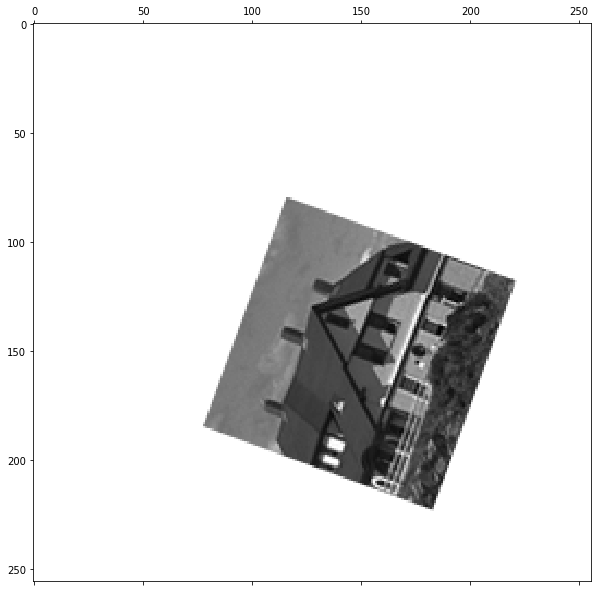

In [10]:
plt.figure(figsize=(10,10))
plt.matshow(ImageP1,cmap='gray',fignum=1)

In [ ]:
img_new[300,300]

In [ ]:
i

In [ ]:
j

In [ ]:
img_new = np.zeros((height,width))
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        imco[0] = i
        imco[1] = j
        imco[2] = 1
        cart_matrix = np.array([[0,1,-0.5],[-1,0,j+0.5],[0,0,1]])
        cartco = np.matmul(cart_matrix,imco)
        x = cartco [0]
        y = cartco [1]
        #transl_matrix = np.array([[1,0,-x],[0,1,-y],[0,0,1]])
        rot_matrix = np.array([[np.cos(70),-np.sin(70),0],[np.sin(70),np.cos(70),0],[0,0,1]])
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        rot = np.matmul(rot_matrix_inv,cartco)
        im_matrix = np.linalg.inv(cart_matrix)
        imco = np.matmul(im_matrix,transl)
        xtn = int(imco[0])
        ytn = int(imco[1])
        img_new[xtn,ytn] = ImageP1[i,j]
        


In [ ]:
plt.figure(figsize=(18,18))
plt.matshow(img_new,cmap='gray',fignum=1)

In [ ]:
img_new = np.zeros((height1,width1))
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        y = 255 - i - 128
        x = j - 128
        cartco = np.array([x, y, 1]).reshape(3,1)
        transl_matrix = np.array([[1,0,-28],[0,1,19],[0,0,1]])
        #transl_matrix = np.array([[np.cos(210),-np.sin(210),0],[np.sin(210),np.cos(210),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        transl = np.matmul(transl_matrix_inv,cartco)
        xtn = transl[0][0]
        ytn = transl[1][0]
        xn = int(128+xtn)
        yn = int(255-ytn-128)
        if((xn<0 or xn>255) or (yn<0 or yn>255)):
            img_new[i,j] = 255
        else:
            img_new[i,j] = ImageP1[yn,xn]
        


In [11]:
img_new = np.zeros((height1,width1))
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        y = 255 - i - 128
        x = j - 128
        cartco = np.array([x, y, 1]).reshape(3,1)
        transl_matrix = np.array([[1,0,-21],[0,1,24.5],[0,0,1]])
        #transl_matrix = np.array([[np.cos(210),-np.sin(210),0],[np.sin(210),np.cos(210),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        transl = np.matmul(transl_matrix_inv,cartco)
        xtn = transl[0][0]
        ytn = transl[1][0]
        xn = int(128+xtn)
        yn = int(255-ytn-128)
        if((xn<0 or xn>255) or (yn<0 or yn>255)):
            img_new[i,j] = 255
        else:
            img_new[i,j] = ImageP1[yn,xn]
        


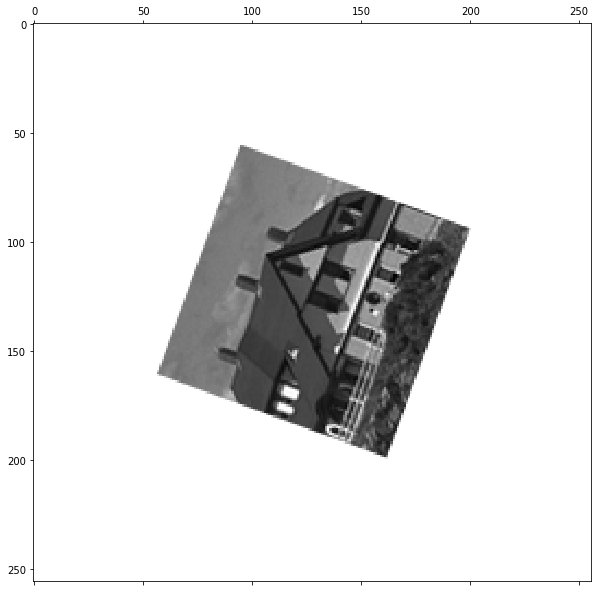

In [12]:
plt.figure(figsize=(10,10))
plt.matshow(img_new,cmap='gray',fignum=1)

In [49]:
img_new = np.zeros((height1,width1))
theta = -1.237#-1.239180
sx = 1.306
sy = 1.43
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        y = 255 - i - 128
        x = j - 128
        cartco = np.array([x, y, 1]).reshape(3,1)
        transl_matrix = np.array([[1,0,-21],[0,1,24.5],[0,0,1]])
        scale_matrix = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        scale_matrix_inv = np.linalg.inv(scale_matrix)
        transl1 = np.matmul(transl_matrix_inv,cartco)
        transl = np.matmul(rot_matrix_inv,transl1)
        #transl = np.matmul(scale_matrix_inv,transl2)
        xtn = transl[0][0]
        ytn = transl[1][0]
        xn = int(128+xtn)
        yn = int(255-ytn-128)
        if((xn<0 or xn>255) or (yn<0 or yn>255)):
            img_new[i,j] = 255
        else:
            img_new[i,j] = ImageP1[yn,xn]
        


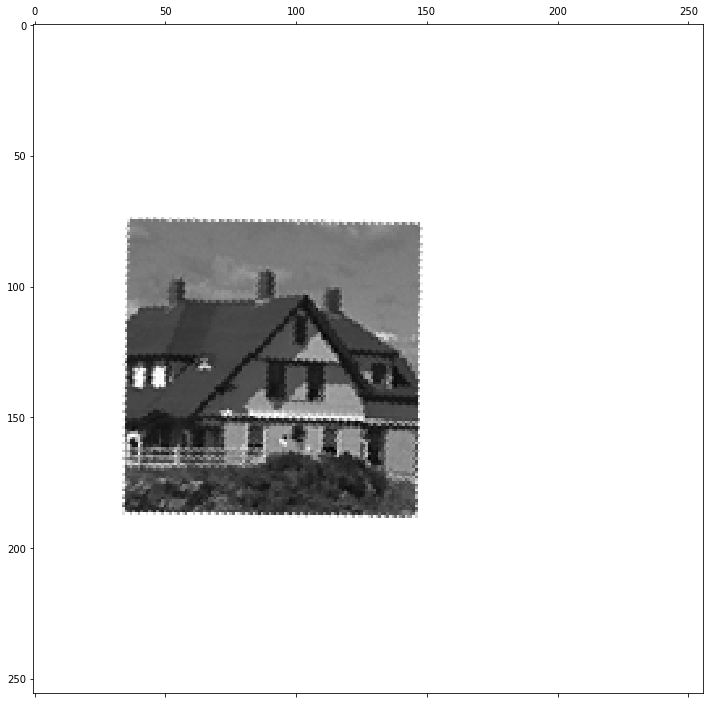

In [50]:
plt.figure(figsize=(12,12))
plt.matshow(img_new,cmap='gray',fignum=1)

In [ ]:
img_new = np.zeros((height1,width1))
theta = -1.239180
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        y = 255 - i - 128
        x = j - 128 
        cartco = np.array([x, y, 1]).reshape(3,1)
        transl_matrix = np.array([[1,0,-20.5],[0,1,24.5],[0,0,1]])
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        transl1 = np.matmul(transl_matrix_inv,cartco)
        transl = np.matmul(rot_matrix_inv,transl1)
        #transl = np.matmul(transl_matrix_inv,transl2)
        xtn = transl[0][0]
        ytn = transl[1][0]
        xn = int(128+xtn)
        yn = int(255-ytn-128)
        if((xn<0 or xn>255) or (yn<0 or yn>255)):
            img_new[i,j] = 255
        else:
            img_new[i,j] = ImageP1[yn,xn]
        


In [ ]:
plt.figure(figsize=(8,8))
plt.matshow(img_new,cmap='gray',fignum=1)

In [ ]:
img_new = np.zeros((height1,width1))
theta = -1.239180
for i in range (0,256):
    for j in range(0,256):
        cartco = np.zeros(3)
        imco = np.zeros(3)
        y = 256 - i + 0.5 
        x = j + 0.5
        cartco = np.array([x, y, 1]).reshape(3,1)
        transl_matrix = np.array([[1,0,-21],[0,1,24.5],[0,0,1]])
        transl_matrix2 = np.array([[1,0,21],[0,1,-24.5],[0,0,1]])
        transl_matrix2_inv = np.linalg.inv(transl_matrix2)
        rot_matrix = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
        transl_matrix_inv = np.linalg.inv(transl_matrix)
        rot_matrix_inv = np.linalg.inv(rot_matrix)
        transl1 = np.matmul(transl_matrix_inv,cartco)
        transl2 = np.matmul(rot_matrix_inv,transl1)
        transl = np.matmul(transl_matrix2_inv,transl2)
        xtn = transl[0][0]
        ytn = transl[1][0]
        xn = int(128+xtn)
        yn = int(255-ytn-128)
        if((xn<0 or xn>255) or (yn<0 or yn>255)):
            img_new[i,j] = 255
        else:
            img_new[i,j] = ImageP1[yn,xn]
        


In [ ]:
plt.figure(figsize=(8,8))
plt.matshow(img_new,cmap='gray',fignum=1)